In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tpot

# Data Loading

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tpot import TPOTRegressor
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('/content/drive/MyDrive/data_HC.csv')

In [78]:
row_count, column_count = df.shape
print(f"Number of rows: {row_count}")
print(f"Number of columns: {column_count}")

Number of rows: 651
Number of columns: 38


In [79]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.00000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.20649,37691.78854
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670


#Data Pre Processing

In [80]:
df.dtypes

Motor_Ship               object
Type_of_Load             object
Docking_Day              object
Docking_Time             object
Sailing_Day              object
Departure_Time           object
Permanence               object
Motor_Ship.1             object
Year_of_Construct       float64
IMO                      object
Max_Speed               float64
Avg_Speed               float64
Gross_tonnage             int64
Dead_Weight             float64
EM_Fuel                  object
AE_Fuel                  object
Engine_Speed             object
Power_ME                float64
LF_ME_Cruising          float64
A_ME                      int64
Power_AE                float64
LF_ME_Maniobra          float64
T_min_Hotell_Formato      int64
T_min_Hotell            float64
Energy_ME_Cruising      float64
Energy_ME_Maniobra      float64
Energy_AE_Cruising      float64
Energy_AE_Maniobra      float64
Energy_AE_Hotelling     float64
ME_Cruising             float64
ME_Maniobra             float64
AE_Cruis

## Handling missing values

In [81]:
df.isna().sum()

Motor_Ship               0
Type_of_Load             0
Docking_Day              0
Docking_Time             0
Sailing_Day              0
Departure_Time           0
Permanence               0
Motor_Ship.1             0
Year_of_Construct        1
IMO                     43
Max_Speed                0
Avg_Speed                0
Gross_tonnage            0
Dead_Weight             43
EM_Fuel                  0
AE_Fuel                  0
Engine_Speed             0
Power_ME                 0
LF_ME_Cruising           1
A_ME                     0
Power_AE                 0
LF_ME_Maniobra           0
T_min_Hotell_Formato     0
T_min_Hotell             0
Energy_ME_Cruising       0
Energy_ME_Maniobra       0
Energy_AE_Cruising       0
Energy_AE_Maniobra       0
Energy_AE_Hotelling      0
ME_Cruising              0
ME_Maniobra              0
AE_Cruising              0
AE_Maniobra              0
AE_Hotelling             0
Caldera_Maniobra         0
Caldera_Hotelling        0
Subtotal_NoCald          0
T

In [82]:
df.query('IMO == "NaN"')

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total


In [83]:
print(df[['Dead_Weight']].value_counts().to_string())

Dead_Weight
11828.0        49
21440.0        35
21449.0        34
23388.0        26
11846.0        25
11811.0        25
5276.0         20
23453.0        18
21413.0        17
640.0          17
21442.0        16
12306.0        15
25775.0        14
11863.0        11
13639.0        10
13172.0        10
17350.0         9
12890.0         8
11768.0         8
16061.0         7
13806.0         6
28186.0         5
13702.0         4
13760.0         4
37865.0         3
23710.0         3
7749.0          3
57381.0         3
34003.0         2
57836.0         2
37679.0         2
58628.0         2
56822.0         2
1473.0          2
55435.0         2
26747.0         2
32029.0         2
28142.0         2
31923.0         2
55711.0         2
21446.0         2
13715.0         2
12864.0         2
39894.0         2
37702.0         2
7770.0          2
37144.0         2
34564.0         2
36489.0         2
60263.0         2
50992.0         1
42913.0         1
45224.0         1
55709.0         1
55692.0         

In [12]:
df[df.isna().any(axis=1)]

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.000000,26714.341620,5818.061720,484.838477,4333.964679,327.861771,18317,37351.206490,37691.788540
22,BARCAZA MAG 13,GENERAL,1/16/2018,4:25:00 AM,1/16/2018,11:00:00 PM,6:35:00 PM,BARCAZA MAG 13,1960.0,NaN,...,662.972472,5590.173423,655.037744,345.014494,28.751208,265.188989,88.768898,13824,6884.165857,6982.534983
23,BARCAZA MAG 18,GENERAL,1/16/2018,4:25:00 AM,1/17/2018,1:30:00 AM,9:05:00 PM,BARCAZA MAG 18,1960.0,NaN,...,752.161593,5590.173423,655.037744,345.014494,28.751208,300.864637,88.768898,15684,6919.841506,7019.502142
27,BARCAZA MAG 21,GENERAL,1/16/2018,4:25:00 AM,1/17/2018,10:20:00 PM,5:55:00 PM,BARCAZA MAG 21,1960.0,NaN,...,1495.404274,5590.173423,655.037744,345.014494,28.751208,598.161710,88.768898,31182,7217.138578,7327.561802
82,CONDESA II,GENERAL,2/12/2018,11:00:00 AM,2/22/2018,7:00:00 AM,8:00:00 PM,CONDESA II,1960.0,NaN,...,8419.453092,5590.173423,655.037744,345.014494,28.751208,3367.781237,88.768898,175562,9986.758105,10197.445590
101,DARYA 1,GENERAL,3/1/2018,5:30:00 PM,3/4/2018,6:30:00 AM,1:00:00 PM,DARYA 1,1960.0,NaN,...,2176.214570,5590.173423,655.037744,345.014494,28.751208,870.485828,88.768898,45378,7489.462697,7609.744449
133,BARCAZA MAG 13,GENERAL,3/20/2018,7:50:00 PM,3/22/2018,6:35:00 AM,10:45:00 AM,BARCAZA MAG 13,1960.0,NaN,...,1239.728792,5590.173423,655.037744,345.014494,28.751208,495.891517,88.768898,25850,7114.868386,7221.589279
135,BARCAZA MAG 18,GENERAL,3/20/2018,7:50:00 PM,3/22/2018,10:30:00 AM,2:40:00 PM,BARCAZA MAG 18,1960.0,NaN,...,1379.458416,5590.173423,655.037744,345.014494,28.751208,551.783367,88.768898,28764,7170.760235,7279.504495
137,BARCAZA MAG 21,GENERAL,3/22/2018,8:05:00 AM,3/23/2018,1:00:00 AM,4:55:00 PM,BARCAZA MAG 21,1960.0,NaN,...,603.513057,5590.173423,655.037744,345.014494,28.751208,241.405223,88.768898,12584,6860.382091,6957.890210
138,BARCAZA MAG 25,GENERAL,3/22/2018,8:05:00 AM,3/23/2018,5:10:00 AM,9:05:00 PM,BARCAZA MAG 25,1960.0,NaN,...,752.161593,5590.173423,655.037744,345.014494,28.751208,300.864637,88.768898,15684,6919.841506,7019.502142


In [84]:
df.isna().any()

Motor_Ship              False
Type_of_Load            False
Docking_Day             False
Docking_Time            False
Sailing_Day             False
Departure_Time          False
Permanence              False
Motor_Ship.1            False
Year_of_Construct        True
IMO                      True
Max_Speed               False
Avg_Speed               False
Gross_tonnage           False
Dead_Weight              True
EM_Fuel                 False
AE_Fuel                 False
Engine_Speed            False
Power_ME                False
LF_ME_Cruising           True
A_ME                    False
Power_AE                False
LF_ME_Maniobra          False
T_min_Hotell_Formato    False
T_min_Hotell            False
Energy_ME_Cruising      False
Energy_ME_Maniobra      False
Energy_AE_Cruising      False
Energy_AE_Maniobra      False
Energy_AE_Hotelling     False
ME_Cruising             False
ME_Maniobra             False
AE_Cruising             False
AE_Maniobra             False
AE_Hotelli

In [85]:
df=df.dropna()

In [86]:
df.isna().sum()

Motor_Ship              0
Type_of_Load            0
Docking_Day             0
Docking_Time            0
Sailing_Day             0
Departure_Time          0
Permanence              0
Motor_Ship.1            0
Year_of_Construct       0
IMO                     0
Max_Speed               0
Avg_Speed               0
Gross_tonnage           0
Dead_Weight             0
EM_Fuel                 0
AE_Fuel                 0
Engine_Speed            0
Power_ME                0
LF_ME_Cruising          0
A_ME                    0
Power_AE                0
LF_ME_Maniobra          0
T_min_Hotell_Formato    0
T_min_Hotell            0
Energy_ME_Cruising      0
Energy_ME_Maniobra      0
Energy_AE_Cruising      0
Energy_AE_Maniobra      0
Energy_AE_Hotelling     0
ME_Cruising             0
ME_Maniobra             0
AE_Cruising             0
AE_Maniobra             0
AE_Hotelling            0
Caldera_Maniobra        0
Caldera_Hotelling       0
Subtotal_NoCald         0
Total                   0
dtype: int64

<ipython-input-87-164b76a619b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['Motor_Ship','Type_of_Load','Year_of_Construct','Max_Speed','Avg_Speed','Gross_tonnage','Dead_Weight','AE_Fuel','Engine_Speed','Power_ME','Power_AE','ME_Cruising','AE_Cruising','Total']].corr()


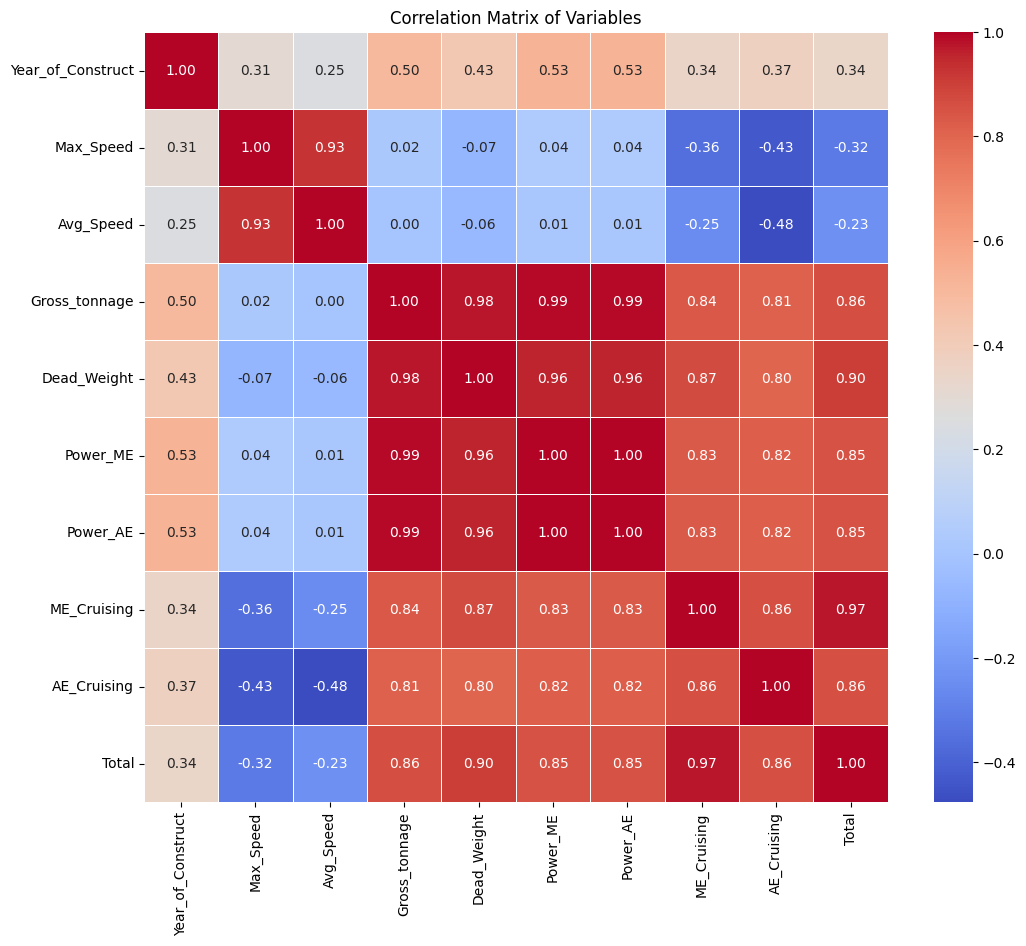

In [87]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df[['Motor_Ship','Type_of_Load','Year_of_Construct','Max_Speed','Avg_Speed','Gross_tonnage','Dead_Weight','AE_Fuel','Engine_Speed','Power_ME','Power_AE','ME_Cruising','AE_Cruising','Total']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Variables")
plt.show()

In [88]:
df.columns

Index(['Motor_Ship', 'Type_of_Load', 'Docking_Day', 'Docking_Time',
       'Sailing_Day', 'Departure_Time', 'Permanence', 'Motor_Ship.1',
       'Year_of_Construct', 'IMO', 'Max_Speed', 'Avg_Speed', 'Gross_tonnage',
       'Dead_Weight', 'EM_Fuel', 'AE_Fuel', 'Engine_Speed', 'Power_ME',
       'LF_ME_Cruising', 'A_ME', 'Power_AE', 'LF_ME_Maniobra',
       'T_min_Hotell_Formato', 'T_min_Hotell', 'Energy_ME_Cruising',
       'Energy_ME_Maniobra', 'Energy_AE_Cruising', 'Energy_AE_Maniobra',
       'Energy_AE_Hotelling', 'ME_Cruising', 'ME_Maniobra', 'AE_Cruising',
       'AE_Maniobra', 'AE_Hotelling', 'Caldera_Maniobra', 'Caldera_Hotelling',
       'Subtotal_NoCald', 'Total'],
      dtype='object')

In [89]:
df.dtypes

Motor_Ship               object
Type_of_Load             object
Docking_Day              object
Docking_Time             object
Sailing_Day              object
Departure_Time           object
Permanence               object
Motor_Ship.1             object
Year_of_Construct       float64
IMO                      object
Max_Speed               float64
Avg_Speed               float64
Gross_tonnage             int64
Dead_Weight             float64
EM_Fuel                  object
AE_Fuel                  object
Engine_Speed             object
Power_ME                float64
LF_ME_Cruising          float64
A_ME                      int64
Power_AE                float64
LF_ME_Maniobra          float64
T_min_Hotell_Formato      int64
T_min_Hotell            float64
Energy_ME_Cruising      float64
Energy_ME_Maniobra      float64
Energy_AE_Cruising      float64
Energy_AE_Maniobra      float64
Energy_AE_Hotelling     float64
ME_Cruising             float64
ME_Maniobra             float64
AE_Cruis

In [90]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670
5,YERUPAJA,CONTENEDORES,1/5/2018,7:40:00 PM,1/6/2018,1:00:00 PM,5:20:00 PM,YERUPAJA,2010.0,9412488,...,13664.680350,52815.49756,6455.949987,4773.906116,397.825510,5465.872139,327.861771,47624,69909.05131,70269.98581


In [91]:
df.Motor_Ship.unique().sum()

'HANSA AUGSBURGHOHEBANKULTRA CORYMAERSK WAKAMATSUYERUPAJAMAERSK WALVIS BAYSAN ADRIANOHANSA FREYBURGJENNIFER SCHEPERSVEGA SAGITTARIUSSEDNA OCEANOLYMPIC PEACEX-PRESS TAJUMULCOGENCO CHARGERMAERSK WILLEMSTADTSMARTSAN ANDRESVEGA ZETATAMPA TRADERVEGA LUNASUNNY HOPEBI JIA SHANCLIPPER SELONIKKEI SIRIUSSAN ALVAROBBC BERGENSTAMFORD EAGLESABRINA ICAP PORTLANDALTHEAUBC TILBURYCONTSHIP PROLIBERTAUBC TORONTOALMERIACONTSHIP NEWDINONORD QUEBECBLUEWINGDARYA 1HOHERIFFGLENGYLEGENCO PREDATORORIENT TOKYOLA CARACOLAINDUSTRIAL ROYALUBC TOKYOCMA CGM TANGERHUAYANG SUNRISESBI PHOENIXPALAWANDRAGONERABALSA 88BBC PAULATIUNAYOGAANHOUT SWANEASTERN CONFIDENCENORD EMPERORCLIFTON BAYCI YUN SHANVOGE EMMAGRAND BREAKERPERAGREENWINGDAIWAN ELEGANCEJUMEIRAH BEACHAS ELENIAFEDERAL BARENTSOCEAN FUTUREFRIO NAGATOSBI PUMACS SARAFINAGENCO WARRIORHIBISCUSNERAIDAACHILLEUSMAERSK WAKAYAMASINOPVEGA SCORPIOEASTERN CAPESTELLAR WALVIS BAYSPAR LYNXINDUSTRIAL GRACEMAGIC STRIKERMELOISTRATEGIC SYNERGYNAUTICAL JENNIFERLOWLANDS BOREASBBC ROMANI

In [92]:
df = df.fillna(df.mean())

<ipython-input-92-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [93]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,72652.90671,18711.021160,4537.753741,378.146145,4726.271190,327.861771,24270,101006.09900,101350.81510
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,53297.42825,8989.314557,3499.295079,291.607923,1708.383074,327.861771,14882,67786.02888,68124.22588
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,74674.34424,9074.873893,4322.585182,360.215432,32628.122180,85.529158,73647,121060.14090,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,108664.30650,10406.430970,7695.122259,641.260188,5125.345586,327.861771,27704,132532.46550,132879.56670
5,YERUPAJA,CONTENEDORES,1/5/2018,7:40:00 PM,1/6/2018,1:00:00 PM,5:20:00 PM,YERUPAJA,2010.0,9412488,...,13664.680350,52815.49756,6455.949987,4773.906116,397.825510,5465.872139,327.861771,47624,69909.05131,70269.98581


# Feature selection

In [94]:
df = df.drop([
 'Motor_Ship.1'
,'Docking_Day','Docking_Time'
,'IMO'
#, 'A_ME'
#, 'Avg_Speed', 'Max_Speed'
#, 'Year_of_Construct'
,'Sailing_Day','Departure_Time'
,'Permanence'
,'T_min_Hotell_Formato','T_min_Hotell'
,'Caldera_Maniobra','Caldera_Hotelling'
,'Subtotal_NoCald'
,'ME_Cruising'
, 'AE_Cruising'
,'ME_Maniobra',	'AE_Maniobra',	'AE_Hotelling'
,'LF_ME_Cruising','LF_ME_Maniobra'
,'Energy_ME_Cruising','Energy_ME_Maniobra','Energy_AE_Cruising','Energy_AE_Maniobra','Energy_AE_Hotelling'
,'Power_ME'
,'Power_AE'
],1)

<ipython-input-94-ddffa6087a0b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([


In [95]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,A_ME,Total
1,HANSA AUGSBURG,CONTENEDORES,2008.0,20.2,19.1,18327,23388.0,RO,RO,MSD,1,101350.81510
2,HOHEBANK,CONTENEDORES,2007.0,15.7,14.6,9996,11828.0,RO,RO,MSD,1,68124.22588
3,ULTRA CORY,GRANEL,2014.0,13.0,11.9,34794,61442.0,RO,MGO,SSD,1,121196.81390
4,MAERSK WAKAMATSU,CONTENEDORES,2010.0,11.8,10.7,17280,21446.0,RO,RO,MSD,1,132879.56670
5,YERUPAJA,CONTENEDORES,2010.0,12.8,10.7,9994,11863.0,RO,RO,MSD,1,70269.98581


from matplotlib import pyplot as plt
_df_0['Year_of_Construct'].plot(kind='hist', bins=20, title='Year_of_Construct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Max_Speed'].plot(kind='hist', bins=20, title='Max_Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Avg_Speed'].plot(kind='hist', bins=20, title='Avg_Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Gross_tonnage'].plot(kind='hist', bins=20, title='Gross_tonnage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Motor_Ship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Type_of_Load').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('AE_Fuel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Engine_Speed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Year_of_Construct', y='Max_Speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Max_Speed', y='Avg_Speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Avg_Speed', y='Gross_tonnage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Gross_tonnage', y='Dead_Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A_ME']
  ys = series['Year_of_Construct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('A_ME', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Motor_Ship')):
  _plot_series(series, series_name, i)
  fig.legend(title='Motor_Ship', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A_ME')
_ = plt.ylabel('Year_of_Construct')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A_ME']
  ys = series['Year_of_Construct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('A_ME', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type_of_Load')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type_of_Load', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A_ME')
_ = plt.ylabel('Year_of_Construct')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A_ME']
  ys = series['Year_of_Construct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('A_ME', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AE_Fuel')):
  _plot_series(series, series_name, i)
  fig.legend(title='AE_Fuel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A_ME')
_ = plt.ylabel('Year_of_Construct')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['A_ME']
  ys = series['Year_of_Construct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('A_ME', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Engine_Speed')):
  _plot_series(series, series_name, i)
  fig.legend(title='Engine_Speed', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('A_ME')
_ = plt.ylabel('Year_of_Construct')

from matplotlib import pyplot as plt
_df_16['Year_of_Construct'].plot(kind='line', figsize=(8, 4), title='Year_of_Construct')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Max_Speed'].plot(kind='line', figsize=(8, 4), title='Max_Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Avg_Speed'].plot(kind='line', figsize=(8, 4), title='Avg_Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Gross_tonnage'].plot(kind='line', figsize=(8, 4), title='Gross_tonnage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type_of_Load'].value_counts()
    for x_label, grp in _df_20.groupby('Motor_Ship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Motor_Ship')
_ = plt.ylabel('Type_of_Load')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AE_Fuel'].value_counts()
    for x_label, grp in _df_21.groupby('Type_of_Load')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Type_of_Load')
_ = plt.ylabel('AE_Fuel')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Engine_Speed'].value_counts()
    for x_label, grp in _df_22.groupby('AE_Fuel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AE_Fuel')
_ = plt.ylabel('Engine_Speed')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Motor_Ship'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Year_of_Construct', y='Motor_Ship', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Type_of_Load'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Year_of_Construct', y='Type_of_Load', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['AE_Fuel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Year_of_Construct', y='AE_Fuel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Engine_Speed'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Year_of_Construct', y='Engine_Speed', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [25]:
df.isna().sum()

Motor_Ship           0
Type_of_Load         0
Year_of_Construct    0
Max_Speed            0
Avg_Speed            0
Gross_tonnage        0
Dead_Weight          0
EM_Fuel              0
AE_Fuel              0
Engine_Speed         0
A_ME                 0
Total                0
dtype: int64

## Encoding categorical variables

In [26]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Motor_Ship']= label_encoder.fit_transform(df['Motor_Ship'])
df['Type_of_Load']= label_encoder.fit_transform(df['Type_of_Load'])
df['EM_Fuel']= label_encoder.fit_transform(df['EM_Fuel'])
df['AE_Fuel']= label_encoder.fit_transform(df['AE_Fuel'])
df['Engine_Speed']= label_encoder.fit_transform(df['Engine_Speed'])

In [27]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,A_ME,Total
1,75,1,2008.0,20.2,19.1,18327,23388.0,0,1,1,1,101350.81510
2,79,1,2007.0,15.7,14.6,9996,11828.0,0,1,1,1,68124.22588
3,199,3,2014.0,13.0,11.9,34794,61442.0,0,0,2,1,121196.81390
4,102,1,2010.0,11.8,10.7,17280,21446.0,0,1,1,1,132879.56670
5,216,1,2010.0,12.8,10.7,9994,11863.0,0,1,1,1,70269.98581


## Splitting Data into Training and Test

In [28]:
target_col = "Total"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

In [30]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred)

#Model Training

## T POT

In [31]:
tpot = TPOTRegressor(generations=5,
                     population_size=60,
                     verbosity=2,
                     mutation_rate=0.5,
                     crossover_rate=0.5,
                     scoring = 'r2',
                     n_jobs=-1)

In [32]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/360 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9160082470374897

Generation 2 - Current best internal CV score: 0.9173454977847039

Generation 3 - Current best internal CV score: 0.9205948904145889

Generation 4 - Current best internal CV score: 0.925320487089143

Generation 5 - Current best internal CV score: 0.9259061740704728

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=5, n_estimators=100)


TPOTRegressor(crossover_rate=0.5, generations=5, mutation_rate=0.5, n_jobs=-1,
              population_size=60, scoring='r2', verbosity=2)

In [33]:
print("R-squared score on the test set:", tpot.score(X_test, y_test))

R-squared score on the test set: 0.9498250181000634


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [34]:
df['Predict'] = tpot.predict(X)
y_pred = tpot.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [35]:
df[['Total','Predict']]

,Total,Predict
1,101350.81510,103954.612040
2,68124.22588,70323.429823
3,121196.81390,207723.150393
4,132879.56670,133426.134080
5,70269.98581,73421.304207
...,...,...
646,148246.98690,152295.935531
647,71451.88801,69609.910149
648,418143.32030,411683.360920
649,152291.18850,152278.433300


In [36]:
y_pred = pd.Series(tpot.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


,True,Prediction
0,150973.15430,152278.433300
1,85391.04164,81433.787666
2,332875.17280,445048.405186
3,68411.07871,69609.910149
4,68834.14783,69609.910149
...,...,...
95,69072.12421,69609.910149
96,80776.57189,79529.074993
97,153056.49860,152278.433300
98,65845.38267,69040.788824


In [37]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

print('Expanded Variance Score',explained_variance_score(y_test, y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('R Sqaure',r2_score(y_test, y_pred))
print([explained_variance_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)])

Expanded Variance Score 0.9499383510140458
Mean Absolute Error 11985.93228322804
Mean Squared Error 733575998.5730883
R Sqaure 0.9498250181000634
[0.9499383510140458, 11985.93228322804, 733575998.5730883, 0.9498250181000634]


## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [39]:
y_prediction =  LR.predict(X_test)
len(y_prediction)

152

In [40]:
y_prediction = pd.Series(LR.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_prediction], axis=1)
z.columns = ['True', 'Prediction']
z.head(100)

,True,Prediction
0,150973.15430,171328.586001
1,85391.04164,85480.415190
2,332875.17280,361158.772053
3,68411.07871,57991.047481
4,68834.14783,57991.047481
...,...,...
95,69072.12421,57991.047481
96,80776.57189,74861.161292
97,153056.49860,171328.586001
98,65845.38267,56249.372365


In [41]:
est = sm.GLM(y_train, X_train,sm.families.Gamma())
est2 = est.fit()
print(est2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  455
Model:                            GLM   Df Residuals:                      445
Model Family:                   Gamma   Df Model:                            9
Link Function:           InversePower   Scale:                        0.075126
Method:                          IRLS   Log-Likelihood:                -5292.7
Date:                Sun, 31 Mar 2024   Deviance:                       30.451
Time:                        23:37:59   Pearson chi2:                     33.4
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9993
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Motor_Ship         7.592e-10   1.17e-0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


## ols

In [42]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     570.9
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          4.24e-238
Time:                        23:37:59   Log-Likelihood:                -5361.3
No. Observations:                 455   AIC:                         1.074e+04
Df Residuals:                     445   BIC:                         1.078e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Motor_Ship          -24.1975     25.83

In [43]:
y_pred_est2 =est2.predict(X_test)
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Expanded Variance Score',explained_variance_score(y_test, y_pred_est2))
print('Mean Absolute Error',mean_absolute_error(y_test, y_pred_est2))
print('Mean Squared Error',mean_squared_error(y_test, y_pred_est2))
print('R Sqaure',r2_score(y_test, y_pred_est2))
print([explained_variance_score(y_test, y_pred_est2),mean_absolute_error(y_test, y_pred_est2),mean_squared_error(y_test, y_pred_est2),r2_score(y_test, y_pred_est2)])

Expanded Variance Score 0.9113911189396169
Mean Absolute Error 18249.973436379074
Mean Squared Error 1305903730.8592193
R Sqaure 0.9106790623106888
[0.9113911189396169, 18249.973436379074, 1305903730.8592193, 0.9106790623106888]


In [44]:
z['Diff']= z['True']-z['Prediction']
z.head()

,True,Prediction,Diff
0,150973.15430,171328.586001,-20355.431701
1,85391.04164,85480.415190,-89.373550
2,332875.17280,361158.772053,-28283.599253
3,68411.07871,57991.047481,10420.031229
4,68834.14783,57991.047481,10843.100349


In [45]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Expanded Variance Score',explained_variance_score(y_test, y_prediction))
print('Mean Absolute Error',mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error',mean_squared_error(y_test, y_prediction))
print('R Sqaure',r2_score(y_test, y_prediction))

Expanded Variance Score 0.9113911189396222
Mean Absolute Error 18249.973436379114
Mean Squared Error 1305903730.8590615
R Sqaure 0.9106790623106996


## GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [47]:
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [48]:
y_pred_gbr = gbr_model.predict(X_test)

In [49]:
# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

In [50]:
print(f'Gradient Boosting Regressor Model Evaluation:')
print(f'Mean Squared Error: {mse_gbr}')
print(f'Root Mean Squared Error: {rmse_gbr}')
print(f'R-squared: {r2_gbr}')

Gradient Boosting Regressor Model Evaluation:
Mean Squared Error: 871317738.8647584
Root Mean Squared Error: 29518.09172126068
R-squared: 0.9404037865719823


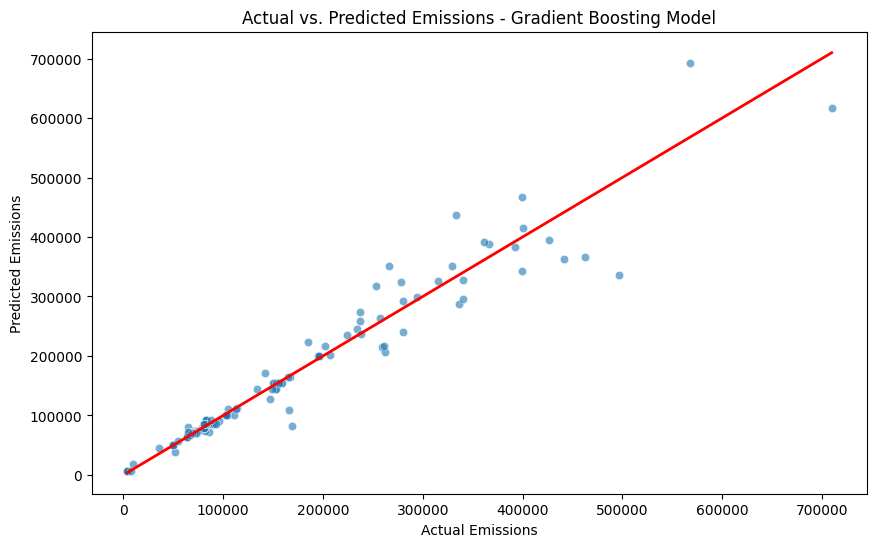

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your Gradient Boosting Regressor predictions were stored in `y_pred_gbr`
# And the actual values are in `y_test` which you may need to reset if it has been modified since its last use

# Ensure y_test is in the correct format (if it's not already a simple list or series, due to previous operations like reset_index())
y_test_reset = y_test.reset_index(drop=True)

# Plotting actual vs. predicted emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reset, y=y_pred_gbr, alpha=0.6)
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], color='red', linewidth=2)  # A reference line for perfect predictions

plt.title('Actual vs. Predicted Emissions - Gradient Boosting Model')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.show()


## XG BOOST

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import xgboost as xgb

In [53]:
# Define the degree of the polynomial
degree = 2

# Create a pipeline that first creates polynomial features, then applies XGBoost regression
xgb_model = make_pipeline(
    PolynomialFeatures(degree),
    xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [54]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [55]:
print(f'XGBoost Regressor Model Evaluation:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

XGBoost Regressor Model Evaluation:
Mean Squared Error: 698131514.534812
Root Mean Squared Error: 26422.178459294606
R-squared: 0.9522493427079192


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [57]:
# Fit the model on the reduced training data
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [58]:
# Make predictions on the reduced test data
y_pred_rf = rf_model.predict(X_test)

In [59]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [60]:
print(f'Random Forest Model Evaluation (Reduced Features):')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')

Random Forest Model Evaluation (Reduced Features):
Mean Squared Error: 759547555.8113976
Root Mean Squared Error: 27559.890344691095
R-squared: 0.9480486208121476


## Non Linear Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [62]:
# Define the degree of the polynomial
degree = 2

# Create a pipeline that first creates polynomial features, then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_poly = poly_model.predict(X_test)

In [63]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [64]:
print(f'Polynomial Regression Model (Degree {degree}) Evaluation:')
print(f'Mean Squared Error: {mse_poly}')
print(f'Root Mean Squared Error: {rmse_poly}')
print(f'R-squared: {r2_poly}')

Polynomial Regression Model (Degree 2) Evaluation:
Mean Squared Error: 598832836.5511183
Root Mean Squared Error: 24471.061206067836
R-squared: 0.9590411534817324


In [65]:
from sklearn.linear_model import LassoCV

# Define a range of alpha values to test
alphas = np.logspace(-3, 1, 20)  # 20 values between 10^-4 and 10^0

# Create a pipeline that first creates polynomial features, then applies Lasso regression with cross-validation
lasso_model = make_pipeline(
    PolynomialFeatures(degree),
    LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Model (Degree {degree}) Evaluation:')
print(f'Mean Squared Error: {mse_lasso}')
print(f'Root Mean Squared Error: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')
print(f'Optimal Alpha: {lasso_model.named_steps["lassocv"].alpha_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109737848633.64067, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109320307026.56458, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109058031757.94434, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: Converge

Lasso Regression Model (Degree 2) Evaluation:
Mean Squared Error: 563077474.8150438
Root Mean Squared Error: 23729.253566327025
R-squared: 0.9614867414391122
Optimal Alpha: 10.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+11, tolerance: 5.737e+08
  model = cd_fast.enet_coordinate_descent(


In [66]:
from sklearn.preprocessing import StandardScaler

# Define a new range of alpha values
alphas = np.logspace(-3, 1, 20)  # 20 values between 10^-3 and 10^1

# Create a pipeline that first standardizes the features, creates polynomial features, then applies Lasso regression
lasso_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree),
    LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=20000)  # Increased max_iter
)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Model (Degree {degree}) Evaluation:')
print(f'Mean Squared Error: {mse_lasso}')
print(f'Root Mean Squared Error: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')
print(f'Optimal Alpha: {lasso_model.named_steps["lassocv"].alpha_}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1012913598.953125, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3870491716.8031616, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6152352279.639099, tolerance: 463510203.54098403
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: Convergenc

Lasso Regression Model (Degree 2) Evaluation:
Mean Squared Error: 591815879.9880291
Root Mean Squared Error: 24327.266184017248
R-squared: 0.9595210978490923
Optimal Alpha: 10.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59544211394.68739, tolerance: 478256359.4278345
  model = cd_fast.enet_coordinate_descent_gram(


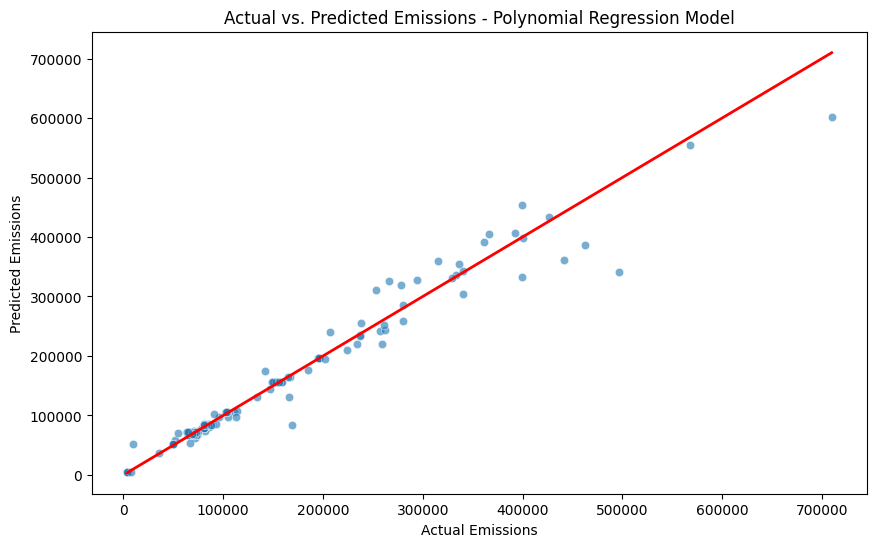

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_test` and `y_pred_poly` are defined from your Polynomial Regression model's evaluation
# If y_test has been modified or reset, ensure it's in its original form
y_test_reset = y_test.reset_index(drop=True)

# Plotting the actual vs. predicted emissions for the Polynomial Regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reset, y=y_pred_lasso, alpha=0.6)
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], color='red', linewidth=2)  # A reference line for perfect predictions

plt.title('Actual vs. Predicted Emissions - Polynomial Regression Model')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.show()


# Model Selection

<ipython-input-67-6b5dbd2b8928>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-67-6b5dbd2b8928>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-67-6b5dbd2b8928>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
<ipython-input-67-6b5dbd2b8928>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')


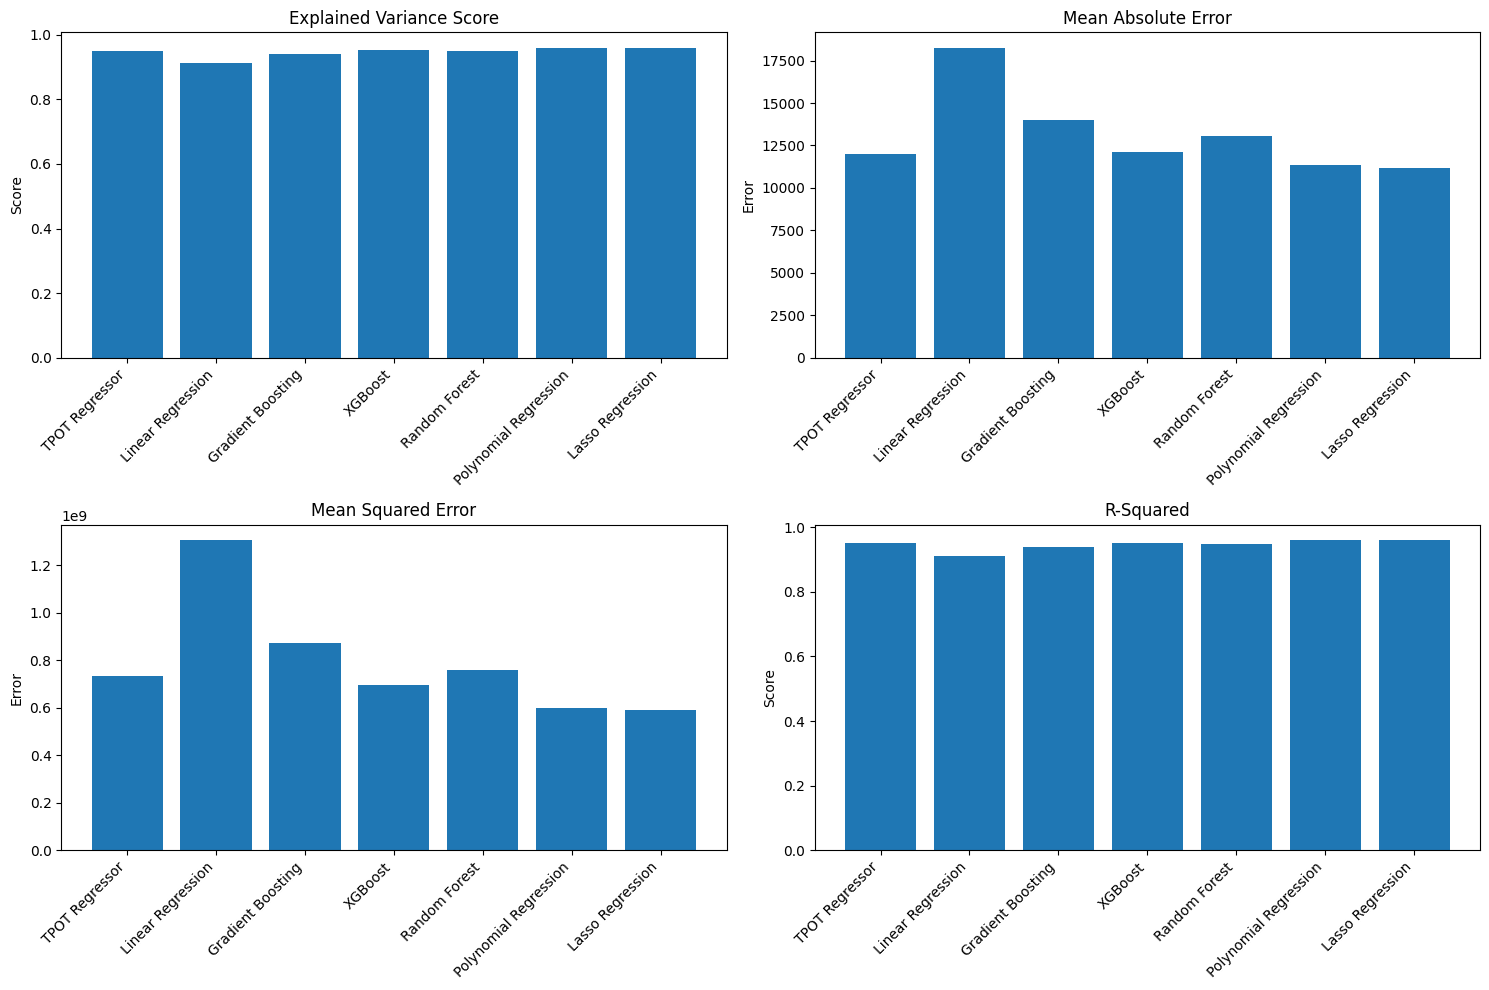

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary table of model performance metrics
model_performance = {
    'Model': ['TPOT Regressor', 'Linear Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'Polynomial Regression', 'Lasso Regression'],
    'Explained Variance Score': [
        explained_variance_score(y_test, y_pred),
        explained_variance_score(y_test, y_prediction),
        explained_variance_score(y_test, y_pred_gbr),
        explained_variance_score(y_test, y_pred_xgb),
        explained_variance_score(y_test, y_pred_rf),
        explained_variance_score(y_test, y_pred_poly),
        explained_variance_score(y_test, y_pred_lasso)
    ],
    'Mean Absolute Error': [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_prediction),
        mean_absolute_error(y_test, y_pred_gbr),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_prediction),
        mean_squared_error(y_test, y_pred_gbr),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    'R-Squared': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_prediction),
        r2_score(y_test, y_pred_gbr),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_lasso)
    ]
}

performance_df = pd.DataFrame(model_performance)

# Visualizing the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Explained Variance Score
axes[0, 0].bar(performance_df['Model'], performance_df['Explained Variance Score'])
axes[0, 0].set_title('Explained Variance Score')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# Mean Absolute Error
axes[0, 1].bar(performance_df['Model'], performance_df['Mean Absolute Error'])
axes[0, 1].set_title('Mean Absolute Error')
axes[0, 1].set_ylabel('Error')
axes[0, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# Mean Squared Error
axes[1, 0].bar(performance_df['Model'], performance_df['Mean Squared Error'])
axes[1, 0].set_title('Mean Squared Error')
axes[1, 0].set_ylabel('Error')
axes[1, 0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

# R-Squared
axes[1, 1].bar(performance_df['Model'], performance_df['R-Squared'])
axes[1, 1].set_title('R-Squared')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [68]:
# Sort the performance dataframe by R-Squared in descending order
sorted_performance_df = performance_df.sort_values(by='R-Squared', ascending=False)

# Select the top model
best_model = sorted_performance_df.iloc[0]

print(f"The best model is {best_model['Model']} with an R-Squared score of {best_model['R-Squared']:.3f}.")


The best model is Lasso Regression with an R-Squared score of 0.960.


In [69]:
# Select the second best model
second_best_model = sorted_performance_df.iloc[1]

print(f"The second best model is {second_best_model['Model']} with an R-Squared score of {second_best_model['R-Squared']:.3f}.")


The second best model is Polynomial Regression with an R-Squared score of 0.959.


In [70]:
# Select the second best model
Third_best_model = sorted_performance_df.iloc[2]

print(f"The Third best model is {Third_best_model['Model']} with an R-Squared score of {Third_best_model['R-Squared']:.3f}.")


The Third best model is XGBoost with an R-Squared score of 0.952.


In [74]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Define your actual and predicted values here
# Replace these with the actual variables from your predictions if they are different
actual = y_test.reset_index(drop=True)  # Actual values
predictions = {
    'TPOT Regressor': tpot.predict(X_test),
    'Linear Regression': LR.predict(X_test),
    'Gradient Boosting': gbr_model.predict(X_test),
    'XGBoost': xgb_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'Polynomial Regression': poly_model.predict(X_test),
    'Lasso Regression': lasso_model.predict(X_test)
}

# Function to calculate metrics
def calculate_performance(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    explained_variance = explained_variance_score(actual, predicted)
    return mse, rmse, r2, explained_variance

# Calculate and print the metrics for each model
for model_name, model_predictions in predictions.items():
    mse, rmse, r2, explained_variance = calculate_performance(actual, model_predictions)
    print(f"{model_name} - Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Explained Variance Score: {explained_variance:.4f}\n")


TPOT Regressor - Performance Metrics:
Mean Squared Error (MSE): 733575998.57
Root Mean Squared Error (RMSE): 27084.61
R-squared (R²): 0.9498
Explained Variance Score: 0.9499

Linear Regression - Performance Metrics:
Mean Squared Error (MSE): 1305903730.86
Root Mean Squared Error (RMSE): 36137.29
R-squared (R²): 0.9107
Explained Variance Score: 0.9114

Gradient Boosting - Performance Metrics:
Mean Squared Error (MSE): 871317738.86
Root Mean Squared Error (RMSE): 29518.09
R-squared (R²): 0.9404
Explained Variance Score: 0.9404

XGBoost - Performance Metrics:
Mean Squared Error (MSE): 698131514.53
Root Mean Squared Error (RMSE): 26422.18
R-squared (R²): 0.9522
Explained Variance Score: 0.9526

Random Forest - Performance Metrics:
Mean Squared Error (MSE): 759547555.81
Root Mean Squared Error (RMSE): 27559.89
R-squared (R²): 0.9480
Explained Variance Score: 0.9485

Polynomial Regression - Performance Metrics:
Mean Squared Error (MSE): 598832836.55
Root Mean Squared Error (RMSE): 24471.06
R

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
